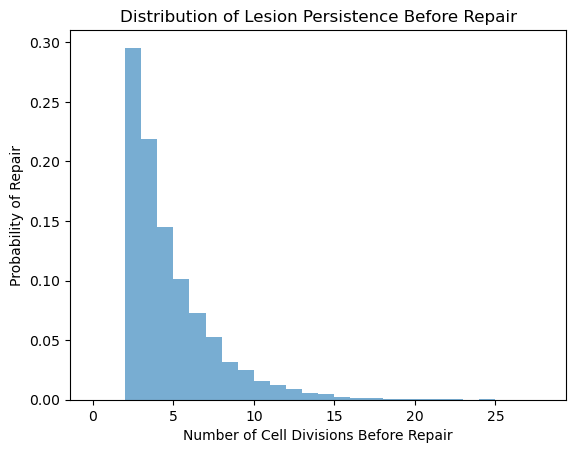

Mean persistence: 4.33
Variance of persistence: 7.79


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_DNA_lesion_persistence(p, n_simulations=1000):
    persistence_duration = [] #Initialises an empty list to store the number of divisions before repair occurs in each simulation.
    
    for _ in range(n_simulations): #Loops n_simulations times to run that many independent experiments
        divisions = 1   #this assumes the lesion already survived one division 
        while True:
            divisions += 1 #adds one more division 
            if np.random.rand() < p: #Check for repair (Bernoulli trial)
                break
        persistence_duration.append(divisions) #Adds the total number of divisions the lesion persisted (before repair) to the results list.
    
    return persistence_duration #Returns the full list of division counts from all simulations.

# Example usage:
p = 0.3  # Repair probability
results = simulate_DNA_lesion_persistence(p, 10000)

# Plot
plt.hist(results, bins=range(0, max(results)+1), density=True, alpha=0.6)
plt.title("Distribution of Lesion Persistence Before Repair")
plt.xlabel("Number of Cell Divisions Before Repair")
plt.ylabel("Probability of Repair")
plt.show()

# Compute statistics
mean_persistence = np.mean(results)
variance_persistence = np.var(results)

print(f"Mean persistence: {mean_persistence:.2f}")
print(f"Variance of persistence: {variance_persistence:.2f}")


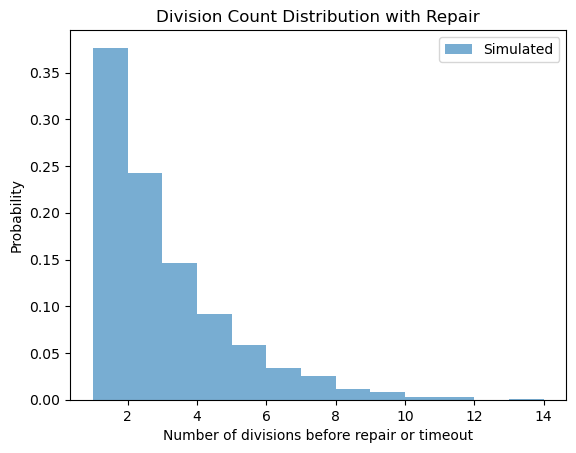

Mean number of divisions: 2.57
Variance: 3.54


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5 # division rate (λ)
T= 10          # end time
rho = 0.3      # repair rate

# Exponential-based repair probability 
def repair_probability(rho, deltaT):
    return 1 - np.exp(-rho * deltaT)

# experiment: track divisions until repair or end time
def experiment_with_repair(mitRate, T, rho):
    t = 0
    nDivisions = 1
    
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT #t+divisiontime
        
        if t > T:
            break  # end of time reached (stop limit exceeds)
        
        # Check for repair (Bernoulli trial)
        if rng.uniform() < repair_probability(rho, deltaT): #Generates a random number between 0 and 1, “With this probability, the repair occurs.”
            
            break
        
        nDivisions += 1  # no repair, continue
    
    return nDivisions

# Run trials
experimentResults = [experiment_with_repair(mitRate, T, rho) for _ in range(nTrials)] #Repeat the division + repair process nTrials times. 

# Plot histogram
plt.hist(experimentResults, bins=range(1, max(experimentResults)+1), density=True, alpha=0.6, label='Simulated')


plt.xlabel("Number of divisions before repair or timeout")
plt.ylabel("Probability")
plt.title("Division Count Distribution with Repair")
plt.legend()
plt.show()

mean_divs = np.mean(experimentResults)
var_divs = np.var(experimentResults)
print(f"Mean number of divisions: {mean_divs:.2f}")
print(f"Variance: {var_divs:.2f}")


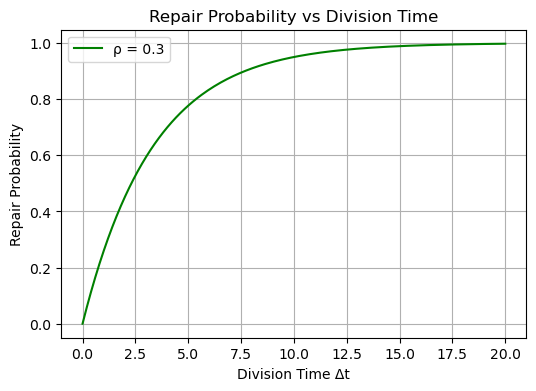

In [6]:
# Time range (possible division times)
deltaT_range = np.linspace(0, 20, 200)

# Corresponding repair probabilities
repair_probs = [repair_probability(rho, deltaT) for deltaT in deltaT_range]

plt.figure(figsize=(6, 4))
plt.plot(deltaT_range, repair_probs, label=f'ρ = {rho}', color='green')
plt.xlabel("Division Time Δt")
plt.ylabel("Repair Probability")
plt.title("Repair Probability vs Division Time")
plt.grid(True)
plt.legend()
plt.show()


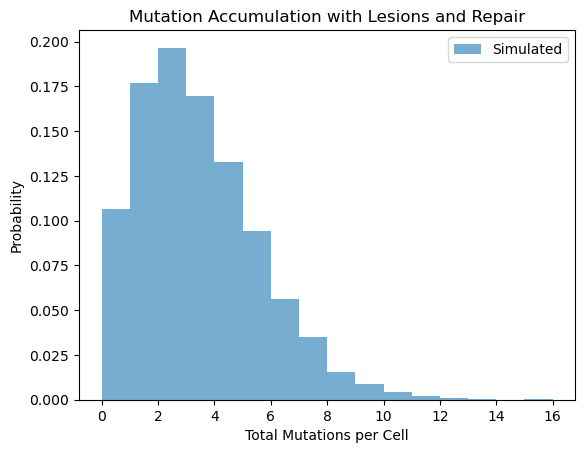

In [4]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# Parameters
nTrials = 5000      
mitRate = 0.5        # division rate (λ)
T = 10               # end time
lesionRate = 2.0     # avg lesions per division (λ_lesions)
rho = 0.3           # repair rate 

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    
    while t < T:
        # Time to next division
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        
        if t > T:
            break  # end time reached
        
        # Lesions acquired this division
        lesions = rng.poisson(lesionRate) #Each division produces a random number of lesions, drawn from Poisson.
        
        # Repairs → mutations
        repairs = rng.binomial(lesions, rho) #Each lesion has a chance rho to become a mutation.
        mutations += repairs #count failed repairs as mutations
    
    return mutations 

# Run trials
mutationCounts = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]

# Plot histogram
plt.hist(mutationCounts, bins=range(0, max(mutationCounts)+1), density=True, alpha=0.6, label='Simulated')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation with Lesions and Repair")
plt.legend()
plt.show()

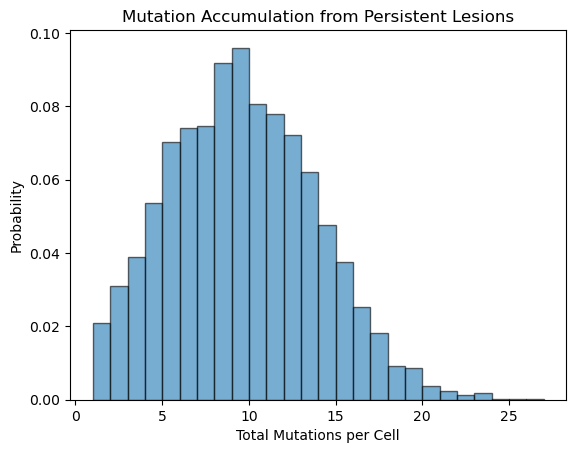

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Random generator
rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5         # Division rate (λ)
T = 10                # end time
lesionRate = 2.0      # Lesions per unit time
rho = 0.3             # Repair rate (per time step)

def simulate_cell(mitRate, T, lesionRate, rho):
    t = 0
    mutations = 0
    old_lesions = 0  # Lesions carried over from previous divisions

    while t < T:
        # Time to next division
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        
        if t > T:
            break  # end time reached

       
        failed_repairs = rng.binomial(old_lesions, 1 - rho) #Each old lesion has a probability 1 - rho to fail repair, becoming a mutation.
        mutations += failed_repairs #These failed repairs are added to the mutations count.

        
        new_lesions = rng.poisson(lesionRate * deltaT) #Each division produces a random number of lesions, drawn from Poisson.

        old_lesions = new_lesions #Add new lesions to old lesions (they can mutate in the next step)

    return mutations # return the number of mutations accumulated.

# Run simulation across many trials
mutation_counts = [simulate_cell(mitRate, T, lesionRate, rho) for _ in range(nTrials)]

# Plot histogram
plt.hist(mutation_counts, bins=range(1, max(mutation_counts) + 1), density=True, alpha=0.6, edgecolor='black')
plt.xlabel("Total Mutations per Cell")
plt.ylabel("Probability")
plt.title("Mutation Accumulation from Persistent Lesions")
plt.show()


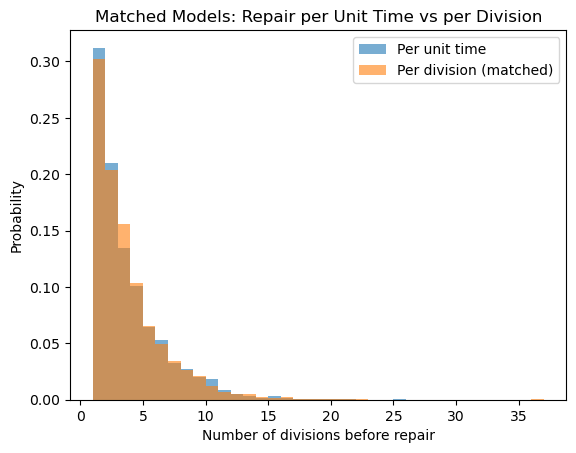

Matched Parameters:
  Division rate λ = 0.5
  Per-division repair probability ρ = 0.3
  Equivalent per-time repair rate ρ_time = 0.2143

Results:
  Mean divisions (unit time model): 3.34
  Mean divisions (per division model): 3.33
  Variance (unit time model): 8.01
  Variance (per division model): 7.77


In [15]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

# Parameters
nTrials = 5000
mitRate = 0.5    # division rate (λ)
rho_div = 0.3    # repair probability per division (Model A)

# Convert to equivalent per-time repair rate (Model B)
rho_time = (mitRate * rho_div) / (1 - rho_div)

# --- Model A: Repair per division ---
def experiment_per_division(mitRate, rho_div):
    t = 0
    nDivisions = 1
    while True:
        if rng.uniform() < rho_div:
            break
        nDivisions += 1
    return nDivisions

# --- Model B: Repair per unit time ---
def experiment_per_time(mitRate, rho_time):
    t = 0
    nDivisions = 1
    while True:
        deltaT = rng.exponential(1 / mitRate)
        t += deltaT
        if rng.uniform() < 1 - np.exp(-rho_time * deltaT):
            break
        nDivisions += 1
    return nDivisions

# Run both models
results_div = [experiment_per_division(mitRate, rho_div) for _ in range(nTrials)]
results_time = [experiment_per_time(mitRate, rho_time) for _ in range(nTrials)]


# Plot
max_bins = max(max(results_time), max(results_div)) + 1
plt.hist(results_time, bins=range(1, max_bins), density=True, alpha=0.6, label='Per unit time')
plt.hist(results_div, bins=range(1, max_bins), density=True, alpha=0.6, label='Per division (matched)')
plt.xlabel("Number of divisions before repair")
plt.ylabel("Probability")
plt.title("Matched Models: Repair per Unit Time vs per Division")
plt.legend()
plt.show()

# Stats
print("Matched Parameters:")
print(f"  Division rate λ = {mitRate}")
print(f"  Per-division repair probability ρ = {rho_div}")
print(f"  Equivalent per-time repair rate ρ_time = {rho_time:.4f}")
print()
print("Results:")
print(f"  Mean divisions (unit time model): {np.mean(results_time):.2f}")
print(f"  Mean divisions (per division model): {np.mean(results_div):.2f}")
print(f"  Variance (unit time model): {np.var(results_time):.2f}")
print(f"  Variance (per division model): {np.var(results_div):.2f}")